In [35]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from gammapy.maps import Map
from astropy.coordinates import SkyCoord #, Angle
from gammapy.modeling import Fit, Parameter, Parameters#, Covariance
from gammapy.datasets import MapDataset #, MapDatasetNuisance
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    SkyModel,
    PointSpatialModel,
    GaussianSpatialModel,
    Models,
    FoVBackgroundModel,
)


import yaml
import sys
import json
from gammapy.modeling.models import create_crab_spectral_model
sys.path.append(
    "/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/syserror_3d_bkgmodel/4-Fitting_nuisance_and_model_parameters"
)
from my_dataset_maps_19 import MapDatasetNuisance
from  my_fit_19 import Fit
from gammapy.estimators import FluxPointsEstimator, FluxPoints
from my_estimator_points_sed_19 import My_FluxPointsEstimator
from my_estimator_points_core_19 import My_FluxPoints
#definitons

In [14]:
source = 'Crab'
path = '/home/vault/caph/mppi062h/repositories/HESS_3Dbkg_syserror/2-error_in_dataset'
#path = '/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/syserror_3d_bkgmodel/2-source_dataset'
path_local_repo = '/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/syserror_3d_bkgmodel/2-source_dataset'
added='_008_624'

models_st = Models.read(f"standard_model.yml")

with open(f'{path_local_repo}/{source}/nui_model{added}.yml', "r") as ymlfile:
    model_dict = yaml.load(ymlfile, Loader=yaml.FullLoader)
models_N = Models.from_dict(model_dict)
fluxfilename = f"{path_local_repo}/{source}/Flux_st.fits"
fluxpoints_st = FluxPoints.read(fluxfilename)
fluxfilename = f"{path_local_repo}/{source}/Flux_N.fits"
fluxpoints_N = My_FluxPoints.read(fluxfilename)
fluxpoints_st.is_ul = fluxpoints_st['sqrt_ts'] <4
fluxpoints_N.is_ul = fluxpoints_N['sqrt_ts'] <4

In [15]:
from gammapy.datasets import FluxPointsDataset
f_dataset_st = FluxPointsDataset(models = models_st[0],
                                data = fluxpoints_st)
f_dataset_N = FluxPointsDataset(models = models_N[0],
                                data = fluxpoints_N)

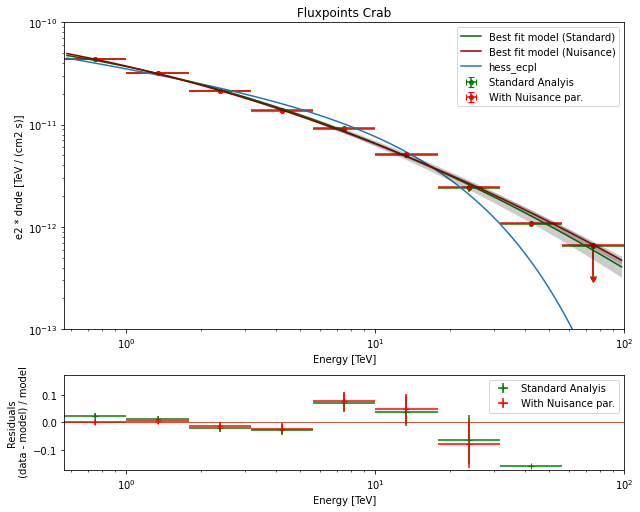

<Figure size 648x504 with 0 Axes>

In [52]:
## plotting the fit:
sed_type = 'dnde'
energy_power = 2

kwargs_residuals= {'color':'green', 'label':'Standard Analyis'}
kwargs_fp = {'label': "Standard Analyis", 'color' : 'green', 'sed_type':sed_type, 'energy_power': energy_power}
kwargs_model = {'label': "Best fit model (Standard)", 'color' : 'darkgreen', 'sed_type':sed_type
                , 'energy_power': energy_power}
kwargs_spectrum  = {'kwargs_fp': kwargs_fp, 'kwargs_model':kwargs_model, }

ax1, ax2 = f_dataset_st.plot_fit(kwargs_spectrum = kwargs_spectrum,
                    kwargs_residuals = kwargs_residuals)
plt.tight_layout()

fig = plt.gcf()
plt.tight_layout()

kwargs_residuals= {'color':'red', 'label':'With Nuisance par.'}
kwargs_fp = {'label': "With Nuisance par.", 'color' : 'red', 'sed_type':sed_type, 'energy_power': energy_power}
kwargs_model = {'label': "Best fit model (Nuisance)", 'color' : 'darkred', 'sed_type':sed_type,
                'energy_power': energy_power}
kwargs_spectrum  = {'kwargs_fp': kwargs_fp, 'kwargs_model':kwargs_model, }

f_dataset_N.plot_fit(ax_spectrum=ax1, ax_residuals=ax2,
                                kwargs_spectrum = kwargs_spectrum,
                                kwargs_residuals = kwargs_residuals)
energy_bounds= [f_dataset_N.data.energy_min[0], f_dataset_N.data.energy_max[-1]] 

crab_types = ['meyer', 'hegra', 'hess_pl', 'hess_ecpl', 'magic_lp']
crab_types = ['hess_ecpl']#, 'hegra', 'hess_pl', 'hess_ecpl', 'magic_lp']

for cr in crab_types:
    create_crab_spectral_model(cr).plot(energy_bounds=energy_bounds, energy_power=2, label=cr, ax = ax1)
ax1.legend(); ax2.legend()
ax1.set_title("Fluxpoints Crab")
ax1.set_ylim(1e-13, 1e-10)

name = f'plots/4_fluxpoints.png'
fig.savefig(name, dpi=300, bbox_inches = 'tight')
name = f'plots/4_fluxpoints.pdf'
fig.savefig(name, dpi=300, bbox_inches = 'tight')
